# Differentiating Between Two Opposing Reddits

By: Christopher Kuzemka: [Github Repository](https://git.generalassemb.ly/chriskuz/project_3)

## Problem Statement

My girlfirned loves to use Reddit. One of her favorite subreddits is ["r/aww"](https://www.reddit.com/r/aww/), a community dedicated forum largely consisting of cute animals and cute moments captured on video and on camera. However, there is another reddit that is the complete opposite of cute animals and cute moments captured on video and on camera -- this subreddit is known as ["r/natureismetal"](https://www.reddit.com/r/natureismetal) -- and it was merged together with "r/aww" to create a "super-subreddit" known as "r/dangerouslycute." The official reason for doing so is unknown, but the top rumor for the merger narrates that both moderators from each subreddit felt that they had enough of a mutual following to justify the merge and consolidate all posts together. This made my girlfriend very upset, as she was never a fan of the content from "r/natureismetal" and now she is tainted by its controversial content. We can also imagine that many others must also feel the same way about the merge. 

As a good data scientist who wishes to make his significant other happy, I have decided to help her make an app that will run Javascript in the background with Reddit and ultimately separate the consolidated subreddit content. She will be writing all other code necessary to create the app, while we will explore the jumbled data of "r/dangerouslycute" and help create the model that will separate the two subreddits from this super-subreddit.

Using data collected previously from the subreddits before the merge, we are going to utilize Natural Language Processing classification models to separate the subreddit content. Our supervised learning models will be judged by their accuracy measure for success. The models we will explore will be LogisticRegression, Multinomial Naive Bayes, and Gaussian Naive Bayes with a use of CountVectorizer and TFIDFVectorizer across our titular data. We will do an in depth analysis on a successful model and explore the various quirks behind the influences of its predictions.

## Executive Summary
A study was conducted where we analyzed the problem of a merged subreddit known as r/dangerouslycute. r/dangerouslycute is a ficional subreddit which includes content from the intimidating and graphic subreddit known as r/natureismetal and and includes content from the happy and positive-intent subreddit known as r/aww. In a sense, each of these subreddits' collective images are polar opposites of one another. They particularly do not share the same Rules and Guidelines and have a stark difference in types of content typically displayed. However, we are unsure of how this merger came to fruition and are now tasked with the problem of generating a model to filter the subreddit. We hope to create a successful model that can be incorporated into a new application which will run in the background of Reddit and eventually wish to generalize such app to to work with other subreddits. 

To gather the data, we utilized the pushshift Reddit API to collect submission data from the two non-fictional subreddits mentioned above. Data such as comment numbers per post, submission scores, classification metrics for appropriate content, date creation, author data, submission titles, and much more were collected for analysis. Much of the data was non-null value, but null text data were imputed with "spaces" for columns where necessary. Much attention was given towards the popularity of the submissions we collected to help understand any biases that would exist in the data. We even discovered which words were most frequent across each subreddit. 

Finally, we constructed three general models (not including a baseline) and tested different vectorizing methods across each model. We also tested a variety of parameters across our models and conducted cross validated gridsearchs to ultimately discover which model performed best with certain features. Ultimately, we were able to come up with a model to passively satisfy any requirements we would need to make a generalized subreddit filtering application, but also opened the idea for future considerations on how such model could be optimized.

## Table of Contents
[1.00 Data Loading](#1.00-Data-Loading)

[2.00 Data Cleaning and Analysis](#2.00-Data-Cleaning-and-Moderate-Analysis)

- [2.01 Quick Check](#2.01-Quick-Check)

- [2.02 Data Documentation Exploration](#2.02-Data-Documentation-Exploration)

- [2.03 Cleaning](#2.03-Cleaning)

- [2.04 Exploratory Data Analysis and Visualization](#2.04-Exploratory-Data-Analysis-and-Visualization)

[3.00 Machine Learning Modeling and Visulalization](#3.00-Machine-Learning-Modeling-and-Visulalization)

- [3.01 Model Preparation](#3.01-Model-Preparation)

- [3.02 Modeling](#3.02-Modeling)

- [3.03 Model Selection](#3.03-Model-Selection)

- [3.04 Model Evaluation](#3.04-Model-Evaluation)

[4.00 Conclusions](#4.00-Conclusions)

[5.00 Sources and References](#5.00-Sources-and-References)


## Data Dictionary (representative of data after cleaning)

|__Data Variable__|__Type__|__Significance__|
|---|---|---|
|`title`|__String Object__|*Submission title*|
|`subreddit`|__String Object__|*Native subreddit of submission*|
|`reddit_creation_identifier`|__Integer__|*ID for when submission was created*|
|`author`|__String Object__|*Submission author*|
|`number_of_comments`|__Integer__|*Number of comments on submission*|
|`score`|__Integer__|*Submission score*|
|`text_in_post`|__Boolean__|*Identifies if text is in post content*|
|`nsfw`|__Boolean__|*Identifies if submission is for mature audiences*|
|`author_flair_text`|__String Object__|*Subtitle for author*|
|`total_awards_received`|__Integer__|*Number of virtual awards a submission receives*|
|`timestamp`|__Datetime Object__|*Date of when submission was created*|

# 1.00 Data Loading

### Package Import

In [1]:
import pandas as pd #imports pandas library
import numpy as np #imports numpy library

import matplotlib.pyplot as plt #imports matplotlib.pyplot library
import seaborn as sns #imports seaborn library

from sklearn.linear_model import LogisticRegression #imports Logistic Regression modeling
from sklearn.model_selection import train_test_split, GridSearchCV #imports data splitting for modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin # this allows us to create a custom transformer
from sklearn.metrics import confusion_matrix

from nltk.corpus import stopwords

import copy as cp #imports sophisticated dataframe copying library

### Loading The Data

In [2]:
dangerouslycute_data = pd.read_csv('../data/dangerouslycute_data.csv') #reads in the initial dataframe 

# 2.00 Data Cleaning and Analysis 

## 2.01 Quick Check

In [3]:
dangerouslycute_data.head() #displays the head of the data

,Unnamed: 0,index,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,over_18,author_flair_text,total_awards_received,timestamp
0,0,0,Huge Grizzly Bear,NaN,natureismetal,1584925587,cobrakiller2000,198,1,False,False,NaN,0,2020-03-22
1,1,1,In my kitchen houseplant..,NaN,natureismetal,1584929238,Bronco7771,2,1,False,False,NaN,0,2020-03-22
2,2,2,In my kitchen houseplant..,NaN,natureismetal,1584929255,Bronco7771,2,1,False,False,NaN,0,2020-03-22
3,3,3,Deathlock,NaN,natureismetal,1584931304,Hamstah_Huey,1,1,False,False,NaN,0,2020-03-22
4,4,4,Seal eats an octopus,NaN,natureismetal,1584940215,huntergill123,231,1,False,False,NaN,0,2020-03-23


We see the first 5 rows of the dataframe displayed above to showcase how our data elements will typically look.  

In [4]:
dangerouslycute_data.tail()

,Unnamed: 0,index,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,over_18,author_flair_text,total_awards_received,timestamp
4995,2495,495,This picture cracks me up every time.,NaN,aww,1574575629,bjax_7,68,1,False,False,NaN,0,2019-11-24
4996,2496,496,Please take me,NaN,aww,1574575720,side_effect7,1,1,False,False,NaN,0,2019-11-24
4997,2497,497,Made me tear up,NaN,aww,1574575767,ancientflowers,0,1,False,False,NaN,0,2019-11-24
4998,2498,498,"Husband: ""We're not getting a cat!"" Husband an...",NaN,aww,1574575820,sleepingdragon80,10,1,False,False,NaN,0,2019-11-24
4999,2499,499,Micio got angry because I poked him in his ponch.,NaN,aww,1574575826,CartonOfPutters,3,1,False,False,NaN,0,2019-11-24


We see the last 5 rows of the dataframe displayed above to showcase how our data elements will typically look. 

In [5]:
dangerouslycute_data.shape #outputs the shape of the dataframe
print("The dataframe is 5000 rows long and has 13 columns.") #prints the observed output of the dataframe

The dataframe is 5000 rows long and has 13 columns.


In [6]:
dangerouslycute_data.isnull().mean().sort_values(ascending = False)

author_flair_text        0.9982
selftext                 0.9894
timestamp                0.0000
total_awards_received    0.0000
over_18                  0.0000
is_self                  0.0000
score                    0.0000
num_comments             0.0000
author                   0.0000
created_utc              0.0000
subreddit                0.0000
title                    0.0000
index                    0.0000
Unnamed: 0               0.0000
dtype: float64

In [7]:
dangerouslycute_data.isnull().sum().sort_values(ascending = False)

author_flair_text        4991
selftext                 4947
timestamp                   0
total_awards_received       0
over_18                     0
is_self                     0
score                       0
num_comments                0
author                      0
created_utc                 0
subreddit                   0
title                       0
index                       0
Unnamed: 0                  0
dtype: int64

In [8]:
dangerouslycute_data.dtypes

Unnamed: 0                int64
index                     int64
title                    object
selftext                 object
subreddit                object
created_utc               int64
author                   object
num_comments              int64
score                     int64
is_self                    bool
over_18                    bool
author_flair_text        object
total_awards_received     int64
timestamp                object
dtype: object

From the above quick checks of the dataframe, we are able to point out a few observations that will need to be dealt with in the data cleaning process. Some columns worth noting are mentioned below:

- `Unnamed: 0` (Unecessary index column providing no useful gaining infomration.)
- `index` (The dataframe already comes with an index so this column is redundant by nature.)
- `author_flair_text` (Majority of this column is null. We may still want to use this. Will groupby subreddit to explore further.)
- `selftext` (Majority of this column is null. We may want to use this. Will groupby subreddit to explore further.)

We will be utilizing Natural Language Processing models to evaluate our subreddits. A strong majority of these models will function appropriately using textual data instead of numeric data. Methods exist where numeric data can be considered into the modeling processes, but using such data will be considered a "judgement call" on the modeling aspect. We can rather use such numeric data to get a better understanding of certain subreddit trends. 

## 2.02 Data Documentation, Exploration and History

### You Must Know the Reddit Lingo

Before we continue further with our study, let's take some time to discuss some of the language of Reddit and ultimately understand its platform. Upon its first observation, the culture of Reddit may be rather difficult to interpret. Fortunately for us, I am an active Reddit user who has been addicted to the platform for over 3 years. Much of any relevant information I will discuss here will be accurate enough for our understanding of this dataframe. 

Reddit is a social media platform constructed of many communities sharing common and niche interests. [A quick Google search](https://www.google.com/search?client=safari&rls=en&q=when+did+reddit+begin&ie=UTF-8&oe=UTF-8) reveals that Reddit was originally created in 2005 by developers [Alexis Ohanian AKA u/kn0thing, Steve Huffman AKA u/spez, Chris Slowe AKA u/KeyserSosa, & Aaron Swartz](https://www.reddit.com/r/AskReddit/comments/21875u/what_happend_with_the_guys_who_created_reddit_are/).Notice that after I just referenced each name for most of the founders, a username was provided respectively associated with each founder -- notice the prefix "u" in "u/insert_username_here". This "u" mentioned before a name indicates a Reddit username and will be found often in our `author` column from our dataframe. 

Reddit follows a similar naming convention when it comes to its sub communities (also known as subreddits). For instance, "r/dangerouslycute", the problematic subreddit we are analyzing in this study, has a prefix "r" in front of its community name. This prefix instantiates the subreddit community path. A subreddit is a forum where users are able to discuss topics and make submissions relevant to the subreddit's guidelines and interests. These subreddits will typically have moderators and automoderators which scrutinize all posts being posted on the subreddit to ensure submissions are inline with the community's set rules and guidelines. This method of scrutify acts as a "judicial system" to help a subreddit thrive in its own collective image. Analyzing the subreddits rules and guidelines will be useful to pay attention to when understanding the content found in our dataframe. 

A submission may be commented on, be rated by score for its popularity, and even receive virtual awards provided by the community. These are all good indicators to determine the ultimate popularity of a submission respective to its own subreddit. Very often, a more popular post will be more inline with the subreddit's collective image. 

### How The Data Was Gathered

*To have a deeper picture of how the data was obtained, it would be best and most recommended to explore the `data_scrape.ipynb` file in the `code` directory of this repository. For convenience, much of the information posted within this referenced notebook is shown here to explain how the data was gathered.*

*The below is directly referenced in `data_scrape.ipynb` -- the original place of where this narrative was created.*

#### The API
Thanks to Reddit's semi-relaxed platform and conditions of data scraping, [sourced here in their robots.txt path](https://www.reddit.com/robots.txt), we are able to successfully obtain various data to help us create a model that answers our problem statement. While in reality, there is no actual subreddit known as "r/dangerouslycute" to actually obtain the jumbled data which my girlfriend is complaining about, we are able to simulate this dataframe conundrum by pulling data from the two original subreddits whose content were merged together: "r/natureismetal" and "r/aww." Upon pulling both sets of data from the subreddits, we can then combine them to create one large dataframe to work with.  

The most easy way of doing this without needing to go through an arduous web-scraping process of navigating ugly HTML is by utilizing an API. APIs are tools made by website developers and/or data-enthusiastic communities which help users (such as ourselves) access features to software. Some APIs are sophisticated enough to allow full modding support for certain software applications. In this case, we are going to use a web API known as [pushshift](https://pushshift.io) to obtain information from Reddit's different communities. Pushshift is a [community generated API originally made by moderators from "r/datasets"](https://github.com/pushshift/api). Its documentation is found in both related pushshift hyperlink sources found within this very paragraph. It is very sophisticated and very useful in quickly obtaining data in json key-value pairs which can be readily parsed through in Python. 

The API has the capability of pulling in data from two main pathways. One pathway searches through reddit submissions (mainly including posts) while the other pathway searches through comments. For this study, we are only going to go through Reddit submissions to help us gather our data for our model. The Reddit submission pathway through the API contains a lot of other accessible data, including the author name of the post, popularity of the post as whole, and more. As a frequent Reddit user and commentater, I personally can vouch for why it may not be wise to use comments as a method for creating a model. The general understanding to remember is this: *posts on reddit go through bot moderated scruitiny, whereas comments do not*. To elaborate, each successful subreddit will have strict guidelines and rules for submitting content relevant to the "sub" and will often have a very dedicated team of moderators who oversee that these rules are followed to the best of everyone's abilities. These rules allow the majority of submitted content to stay relevant to the community's interests and stay relevant to the subreddit's purpose. Comments are typically more plentiful than submissions and are often overlooked by moderators. Comments as an entity are always left open to interpretation and do not undergo as much scrutiny as posts do. This allows commentators to write narratives that may go on complete tangents from the original context of the submission -- solely in the spirit of online discussion. As a reuslt, we may find examples of people talking about their favorite movies or foods on subreddits only discussing how cute cats are.

The next step was to consider which features were going to be important to understand for our model. Using the API's documentation, we decided on these features below to make any necessary data cleanup later on easier for us. The list of features which were thought to be relevant for our model are:

- `title` (title of the submission)
- `selftext` (text of post submission )
-  `subreddit` (name of the submission's associated subreddit)
- `created_utc` (time stamp of submission)
- `author` (name of the submission author)
- `num_comments` (number of comments with the submission)
- `score` (aggregated score of the submission incorporating the difference of upvotes and downvotes)
-  `is_self` (boolean to determine if the submission is solely text post)
-  `over_18` (boolean to determine if content is NSFW)
- `author_flair_text` (flair text native to the author when posting on a specific subreddit)
- `total_awards_received` (number of awards received)

#### Why These Features?
These features were thought out and chosen out of the plethora of features we could pull because of their possible predictive ability to create our model. Below is a quick list of reasoning behind each variable's selection:

- `title` (necessary to determine titular key words)
- `selftext` (useful to find any key words to be added to our NLP modeling)
- `subreddit` (our prediction values)
- `created_utc` (verifies the uniqueness of data)
- `author` (may be useful in determining user interest per subreddit)
- `num_comments` (useful to find popular submissions within a subreddit)
- `score` (useful in determining the validity of a post to a subreddit by its popularity)
- `is_self` (useful in identifying posts with added text)
- `over_18` (boolean to determine if content is NSFW)
- `author_flair_text` (may be useful is finding relevant text related to a subreddit per author)
- `total_awards_received` (useful in understanding a post's weight on the subreddit)

### r/aww's Image
-----------------------------------------------------

#### r/aww's Size

As of April 22nd, 2020 at 11:10 P.M. ETC, the member size of r/aww is 24,469,289 users with 34,038 users online currently.
  
-----------------------------------------------------

#### r/aww's About

"*Things that make you go AWW! Like puppies, bunnies, babies, and so on... A place for really cute pictures and videos!*"

-----------------------------------------------------

#### r/aww's Rules & Guidelines

*1) No "sad" content*
- *No "sad" content, such as pics of animals that have passed away (try /r/petloss), animals that have been injured/abused, or sob stories (e.g. found him in a dumpster, finding abandoned animals, sick/survived cancer).*

*2) No captioned pictures/videos*
- *No comics, captioned pictures/videos (try /r/lolcats, r/cute, or /r/animaltextgifs), or photos of just text. No memes or snapchat captions.*

*3) No asking for upvotes or approval*
- *No post titles asking for upvotes or approval, such as "any love for...", "what does /r/aww think of...", or "this didn't get much love on...", or "karma machine", "sort by new", "don't scroll past", "not your typical aww", "r/aww needs more \[X\] animals".*

*4) No harassment*
- *No slurs or harassing comments.*

*5) Posts must link to sites on our approved list*
- *No posts with links to sites not on the approved list.*

*6) No NSFW content*
- *This includes not only inappropriate images but also inappropriate text, innuendo, or inappropriate jokes in comments. No comments about how dangerous certain domesticated breeds are, or about eating the animals in the post.*

*7) No asking for donations or adoptions*
- *No asking for donations, sponsorship or adoptions (try /r/care or /r/assistance).*

*8) No bots or bot-like behaviour*
- *No bots or bot-like behaviour. This includes copypasting titles and/or comments, or generally acting like a script/bot. No flooding (more than 4 posts in a 24 hour period).*

*9) No lying about ownership*
- *No false claims of content ownership.*

*10) No social media*
- *No links to social media content, whether in comments, submissions, image/video descriptions (including imgur gallery descriptions for direct links), or as superimposed text in an image. Handles are okay in comments as long as they're not links.*

[Source](https://www.reddit.com/r/aww/wiki/index)

### r/natureismetal's Image

-----------------------------------------------------

#### r/natureismetal's Size

As of April 22nd, 2020 at 11:10 P.M. ETC, the member size of r/natureismetal is 1,469,418 users with 2,942 users online currently.
  
-----------------------------------------------------

#### r/natureismetal's About

"*Badass pictures, gifs and videos of the awesome true brutality of nature*"

-----------------------------------------------------

#### r/natureismetal Rules & Guidelines

*1) Human Involvement*
- *Animals hurting/attacking humans is okay. Humans harming or killing animals is not allowed. No intentional human orchestrated interaction: this includes organized animal fighting and people feeding or baiting animals. This rule also includes animals being harmed at the hands of artificial objects (cars, fences, powerlines etc).
For humans being metal, check out r/HumansAreMetal.*

*2) Non-Descriptive Title*
- *Posts with titles that don't accurately describe the content or are purposefully misleading may be removed. Identify the animals/plants/content present in your title. Low effort titles such as 'X is metal!' may be removed. We don't allow 'I see you and I raise you' titles.*

*3) Reposts*
- *Any content previously posted within the last 120 days to r/natureismetal will be removed.
No submissions allowed from the NiM Top 50.
No submissions from the NiM Hall of Fame or the NiM Hall of Shame.
Reposting will be adjudicated on a 3 strikes policy. (1: warning, 2: temp ban, 3: permenant ban)
Word-for-word reposts will be removed.*

*4) Animals in Captivity*
- *No posting of zoo animals, domestic pets, animals in laboratories, circuses, hunting preserves, show business, feral cats and dogs, and alligator/crocodile wrangling. Farm animals and non-mammalian aquarium animals are allowed provided there is no human instigated feeding, baiting or violence. Anyone posting organized animal fighting will be banned permanently.*

*5) Non-Animal Content*
- *Acts of nature are allowed provided the content is metal. Posts must feature something nature related.*

*6) NSFW Tags*
- *Tag bloody or gory submissions as NSFW. If a mod tags your submission NSFW do not untag it. Posts involving human gore should be tagged NSFW and marked with the Humans Remains (NSFL) post flair.*

*7) No Click Bait or Shit Posts*
- *Seriously. We will kill you.*

*8) Animal Remains*
- *No images of piles of feathers or blood and guts. Remains must have some metal factor to them. Bad ass skeletons and skulls are allowed.
Human Remains are allowed only under the following conditions:
Damage seen in the submission must have been caused by animals and animals only. No other forms of nature or disease are allowed. Any submission must be fully marked with both NSFW and Human Remains (NSFL) flair or the submission will be removed. Repeated violations may result in a ban.*

[Source](https://www.reddit.com/r/natureismetal/submit)

### Takeaways

With both subreddit rules and guidelines displayed above, we can immediately see the controversy in the merge for r/dangerouslycute. Each subreddit's restrictions are vastly different and we can infer how r/natureismetal's graphic content simply does not fit with r/aww's content (not to also mention the lack of political correctness in r/natureismetal's rules and guidelines). 

From the rules and guidelines, we can begin to look for certain instances where we might see helpful features to incorporate into our predictions:


|__r/aww Rule__|__r/natureismetal Rule__|__Highlighted Takeaway__|
|---|---|---|
|Rule 1|Rule 1 & Rule 8|*Clear polarity between accepted subreddit content*|
|Rule 6|Rule 6|*Clear polarity between accepted subreddit content*|
|Rule 3|Rule 2|*r/natureismetal requires that titles are descriptive whereas r/aww has a different restriction in post titles.*|


## 2.03 Data Cleaning 

### Dropping Unecessary Columns

In [9]:
dangerouslycute_data.drop(columns = ['index', 'Unnamed: 0'], inplace = True) #drops columns 

### Renaming Columns To Be Human Readable

In [10]:
columns_dict = {
    "selftext": "post_subtext",
    "created_utc": "reddit_creation_identifier",
    "num_comments": "number_of_comments",
    "is_self": "text_in_post",
    "over_18": "nsfw",
} #naming dictionary to rename certain columns
dangerouslycute_data.rename(columns = columns_dict, inplace = True) #renames the columns

### Handling Nulls

In [11]:
dangerouslycute_data.isnull().mean().sort_values(ascending = False) #outputs the nulls by their percentage in the 

author_flair_text             0.9982
post_subtext                  0.9894
timestamp                     0.0000
total_awards_received         0.0000
nsfw                          0.0000
text_in_post                  0.0000
score                         0.0000
number_of_comments            0.0000
author                        0.0000
reddit_creation_identifier    0.0000
subreddit                     0.0000
title                         0.0000
dtype: float64

Only two columns contain a large number of nulls. We will investigate them further. 

In [12]:
dangerouslycute_data['author_flair_text'].unique() #displays unique values of such columns

array([nan, 'ew', 'Framed', 'Trusted User', 'Bold Black',
       'Ask me about snakes'], dtype=object)

In [13]:
dangerouslycute_data['post_subtext'].unique() #displays the unique values of such columns

array([nan, '[deleted]'], dtype=object)

The `post_subtext` column is filled with meaningless information. We will remove it from our dataframe. The `author_flair_text` column may have some useful information inside it, so we will impute values inside of it. The text values we will impute will substitute a "null" value. To impute a placeholder null value, we will impute a "space." This should not harm our model as the information we are imputing is non-numeric and has not magnitudinal value. The text that already exists in the column may actually all be from a certain sub. We will explore further in our EDA analysis. 

In [14]:
dangerouslycute_data.drop(columns = 'post_subtext', inplace = True) #drops post_subtext column due to nulls

In [15]:
dangerouslycute_data.fillna(value = ' ', inplace = True) #fills null values with spaces

## 2.04 Exploratory Data Analysis and Visualization

### Data Masking

To explore our data, we are going hone into the data individually per subreddit. We will be cautious in this process and work on a copy of this dataframe so that we do not make any permanent changes to the data that causes us to restart our kernal. 

In [16]:
jumbled_df = cp.deepcopy(dangerouslycute_data) #creates a new dataframe copy

In [17]:
aww_mask = jumbled_df['subreddit'] == 'aww' #sets a mask for finding just r/aww content
aww_df = jumbled_df[aww_mask] #creates just a dataframe of r/aww content
aww_df.shape

(2500, 11)

In [18]:
metal_mask = jumbled_df['subreddit'] == 'natureismetal' #sets a mask for finding just r/natureismetal content
metal_df= jumbled_df[metal_mask] #creates just a dataframe of r/natureismetal content
metal_df.shape

(2500, 11)

The above two code cells create two separate dataframes utilizing masking techniques. Each dataframe dedicated to each subreddit has an equal shape of 2500 rows and 11 columns. We will now observe the distribution of some of the data involving numeric columns as well as explore certain key aspects of each column. 

### Numeric Data Analysis

In [19]:
#Function to show side by side histogams
def plot_hists(dcolx1,dcolx2,suptitle,xlabel1,ylabel1,title1,xlabel2,ylabel2,title2):
    fig, axs = plt.subplots(figsize = (30,16), nrows = 1,ncols = 2) #utilizes matplotlib subplotting methods
    fig.suptitle(suptitle, size = 30) #sets a superior title for the plots
    
    axs[0].hist(dcolx1,bins = 100) #left histogram
    axs[0].set_title(title1, size = 25) #left plot title
    axs[0].set_xlabel(xlabel1, size = 25) #left plot xlabel
    axs[0].set_ylabel(ylabel1, size = 25) #left plot ylabel
    axs[0].grid(which = 'both') #grid on
    
    axs[1].hist(dcolx2, bins = 100) #right histogram
    axs[1].set_title(title2, size = 25) #right plot title
    axs[1].set_xlabel(xlabel2, size = 25) #right plot xlabel
    axs[1].set_ylabel(ylabel2, size = 25) #right plot ylabel
    axs[1].grid(which = 'both') #grid on

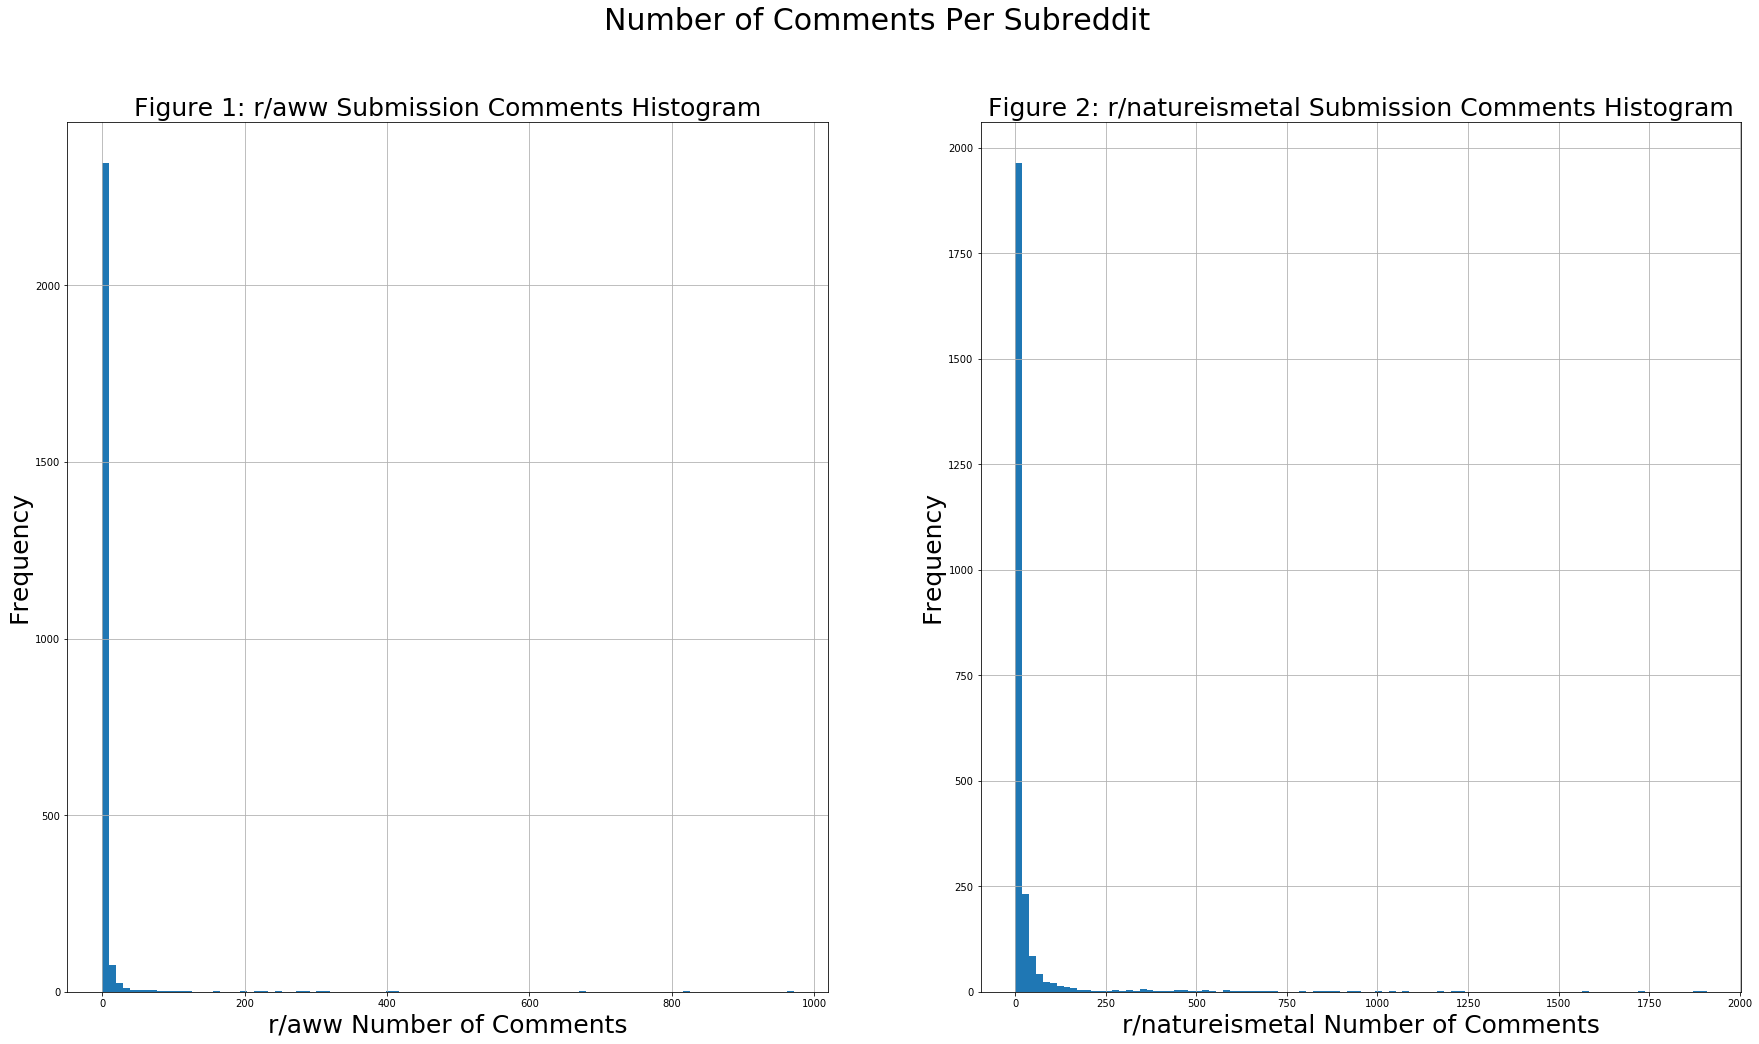

In [20]:
xdcol1 = aww_df['number_of_comments'] #left plot x data
xdcol2 = metal_df['number_of_comments'] #right plot x data

bigtitle = 'Number of Comments Per Subreddit' #superior title
leftx = 'r/aww Number of Comments' #left plot xlabel
lefty = 'Frequency' #left plot ylabel
lefttitle = 'Figure 1: r/aww Submission Comments Histogram' #left plot title
rightx = 'r/natureismetal Number of Comments' #right plot xlabel
righty = 'Frequency' #right plot ylabel
righttitle = 'Figure 2: r/natureismetal Submission Comments Histogram' #right plot title

plot_hists(xdcol1,xdcol2,bigtitle,leftx,lefty,lefttitle,rightx,righty,righttitle) #utilizes function

Both in Figure 1 and Figure 2, a visual decription is shown about what kind of popularity our data is experiencing through the number of comments being made per submission. The distributions are right skewed and showing a high frequency of sumbissions with less than 200 comments, in our data per subreddit. Interestingly, the top comment threshold per subreddit sample is different from one another, where r/aww in Figure 1 seems to show submissions with less comments than r/natureismetal in Figure 2. Fortunately both of the dataframes are of equal shape, which helps us make the visual examinations of how the critical points of frequency change between each graph -- notice how there is a higher frequency of lower commented submissions in Figure 1 than in Figure 2. This is another way to show how our equal sized subreddit comment distributions are being spread out, where Figure 2 has a more instances of higher commented submissions.    

Let's examine some other unique measures below.

In [21]:
np.sort(aww_df['score'].unique()) #outputs a sorted display of unique score values

array([1, 2, 3, 7])

In [22]:
 np.sort(metal_df['score'].unique()) #outputs a sorted display of uniqu score values

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    33,    34,    38,    44,    47,    54,
          57,    62,    63,    64,    66,    69,    72,    76,    77,
          81,    93,    96,    97,   103,   106,   111,   112,   138,
         150,   206,   280,   336,  2004,  4521,  6323, 15133, 40830])

The above outputs of code show the unique score values of each subreddit as well as the number of awards received for each submission post form each reddit. The unique scores found throughout the subreddits are displayed here: 

- __Unique Submission Scores for r/aww:__ 1, 2, 3, 7

- __Unique Submission Scores for r/natureismetal:__ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 38, 44, 47, 54, 57, 62, 63, 64, 66, 69, 72, 76, 77, 81, 93, 96, 97, 103, 106, 111, 112, 138, 150, 206, 280, 336, 2004, 4521, 6323, 15133, 40830


r/natureismetal has a wider distribution of numeric value scores and has a wider distribution of numeric value comments per submission than r/aww has. r/natureismetal has a maximum score value of 40,0830 points on at least one submission while r/aww has a maximum score value of 7 points on at least one submission. 


It is also noticed that r/aww does not contain any submissions with awards, while r/natureismetal does:

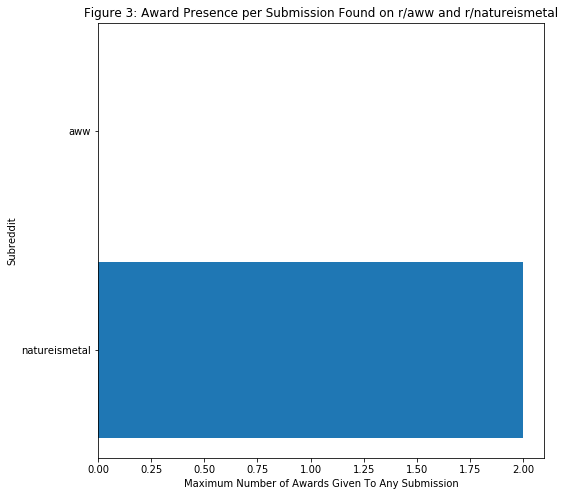

In [23]:
plt.figure(figsize = (8,8))
plt.barh(jumbled_df['subreddit'], jumbled_df['total_awards_received'])
plt.xlabel('Maximum Number of Awards Given To Any Submission')
plt.ylabel('Subreddit')
plt.title('Figure 3: Award Presence per Submission Found on r/aww and r/natureismetal');

Figure 3 above shows the maximum number of awards found on any given post observed in each subreddit. In the data collected, through value counts of the awards present, we found that there existed data in r/natureismetal where submissions were given virtual awards. Popular submissions will typically have more comments, higher scores, and more awards given.

__What can we infer from this numeric data analysis?__ We can infer more about what kind of data was collected through the API from sampling and understand more about what kind of traffic is found on each subreddit. Previously, it was stated that the member population of r/aww was approximately 24.4 million users whereas the the member population of r/natureismetal is approximately 1.4 million users. The r/aww subreddit will receive more traffic than the r/natureismetal subreddit. As the API brought in new submission data in 30 day increments at a rate of 500 submissions per request, this shows that the data gathered from r/aww were posts that were fairly new to the subreddit and did not receive much attention (and possibly did not receive much scruitiny). 

When we begin to create our NLP models, we will have to keep this in mind when encountering any errors. There exists a possibility that any data that did not receive much popularity and/or scruitiny is more prone to being an outlier to its respective subreddit. We will have to create our models on subreddit posts that cannot effectively express the collective image of the subreddit communities to a certain degree of confidence. 

With regard to creating a model to work with our Javascript application, careful attention will have to be given into the performance of our model and some understanding with what is mentioned above regarding the distribution weight. It may be best to let my girlfriend know that we should think about gathering data with higher popularity or data with less skewed distribution in popularity metircs. Therefore, our NLP models will be exposed to content that successfully agrees with a subreddit's collective image. 

### Natural Language Data Analysis. 

We are going to analyze the submission titles across the subreddits. These titles are going to be the main idicators for our modeling process. We will start by analyzing the most common words per subreddit. Without any filtering, we will expect some of the most common words to be meaningless towards our classification models. While automatically counting all the most common words in a subreddit without filtering may be a smart way to find out what words differentiate each subreddit, how can we immediately say that most of the common words will be meaningless before looking at some analysis? Let's begin by observing the plots below. 

In [24]:
#Plots a vectorized version of the words.
def plot_wordvec(dcolx1,dcolx2,suptitle,xlabel1,ylabel1,title1,xlabel2,ylabel2,title2,stops):
    fig, axs = plt.subplots(figsize = (30,15), nrows = 1,ncols = 2) #utilizes matplotlib subplotting methods
    fig.suptitle(suptitle, size = 30) #sets a superior title for the plots
    
    #Left Plot
    cv = CountVectorizer(stop_words = stops) #instantiates the CountVectorizer()
    cv.fit(dcolx1) #fits the CountVectorizer on the left x data column
    X_cv1 = cv.transform(dcolx1) #transforms the left x data
    
    #Credit to Noah for the below lines of code
    words1 = pd.DataFrame(X_cv1.todense(), columns=cv.get_feature_names()) #converts the vectorized words into a dense dataframe
    words1_top = words1.sum().sort_values(ascending = False).head(20) #creates the top 20 words 

    
    words1_top.plot(ax = axs[0], kind = 'barh') #makes the horizontal barplot using pandas plotting
    axs[0].set_title(title1, size = 25) #left plot title
    axs[0].set_xlabel(xlabel1, size = 25) #left plot xlabel
    axs[0].set_ylabel(ylabel1, size = 25) #left plot ylabel

    #Left Plot
    cv = CountVectorizer(stop_words = stops)#instantiates the CountVectorizer()
    cv.fit(dcolx2) #fits the CountVectorizer on the left x data column
    X_cv2 = cv.transform(dcolx2) #transforms the left x data

    #Credit to Noah for the below lines of code
    words2 = pd.DataFrame(X_cv2.todense(), columns=cv.get_feature_names()) #converts the vectorized words into a dense dataframe
    words2_top = words2.sum().sort_values(ascending = False).head(20) #creates the top 20 words 

    words2_top.plot(ax = axs[1], kind = 'barh') #makes the horizontal barplot using pandas plotting
    axs[1].set_title(title2, size = 25) #right plot title
    axs[1].set_xlabel(xlabel2, size = 25) #right plot xlabel
    axs[1].set_ylabel(ylabel2, size = 25) #right plot ylabel

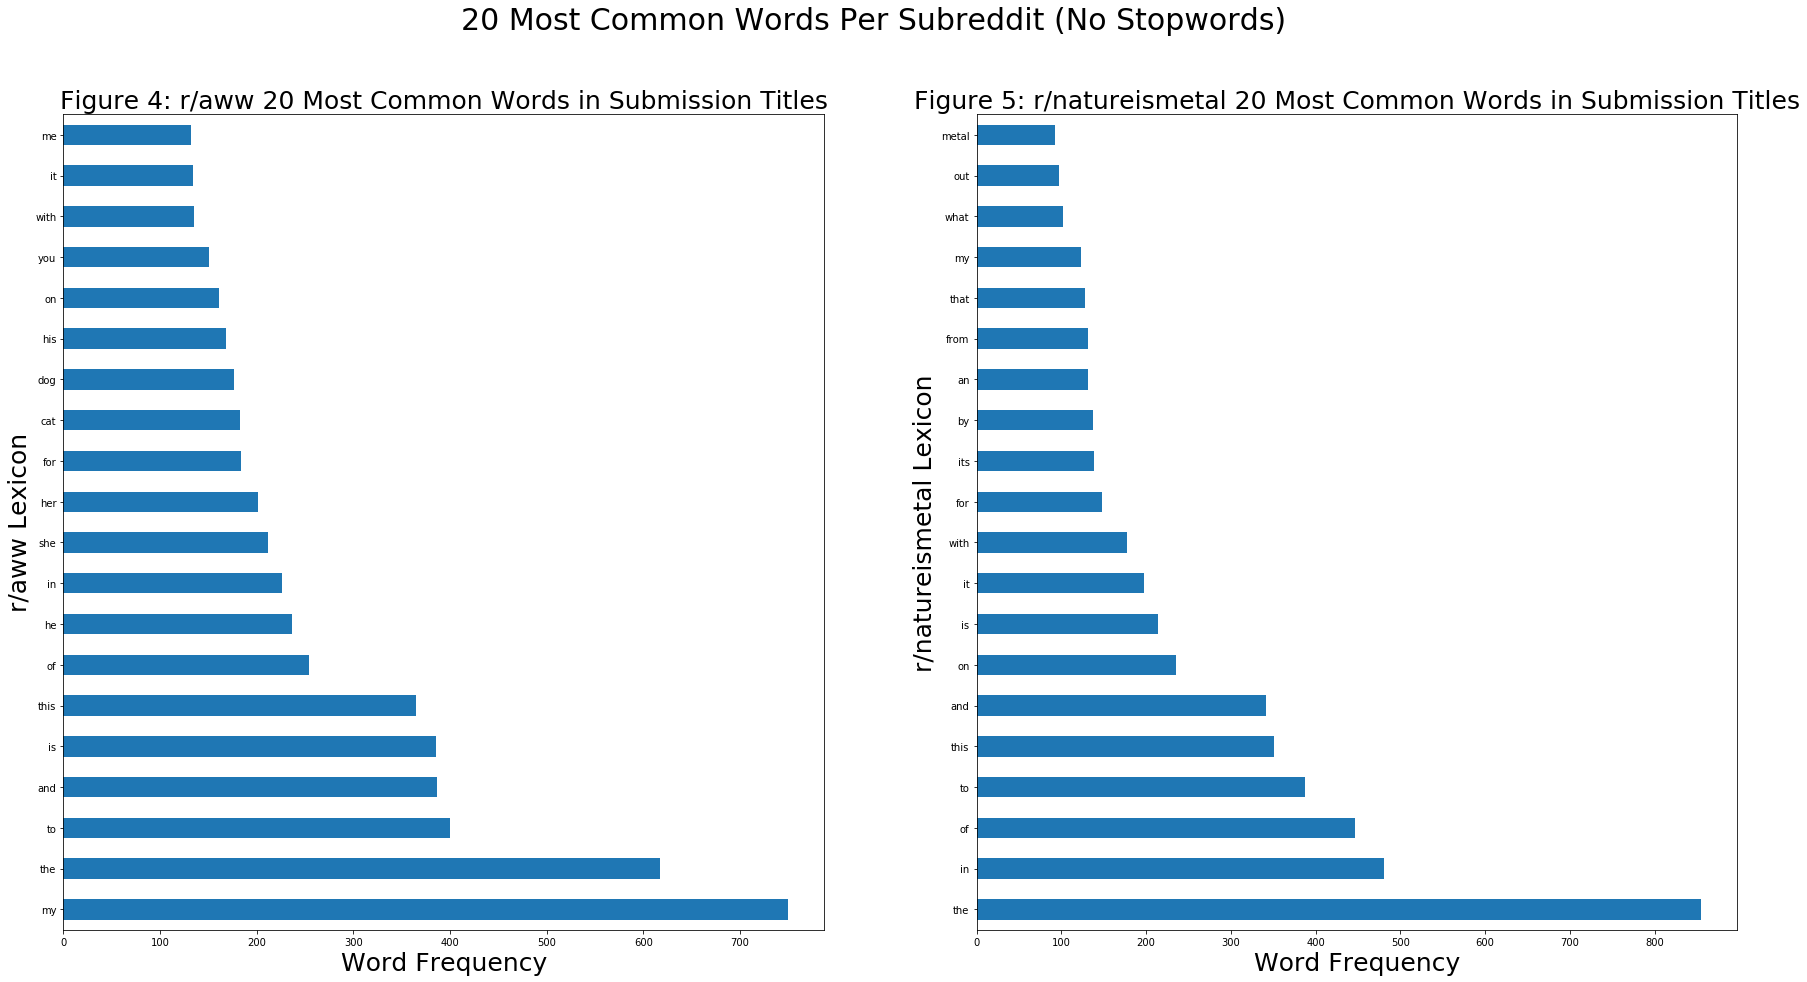

In [25]:
xdcol1 = aww_df['title'] #left plot x data
xdcol2 = metal_df['title'] #right plot x data

bigtitle = '20 Most Common Words Per Subreddit (No Stopwords)' #superior title
leftx = 'Word Frequency' #left plot xlabel
lefty = 'r/aww Lexicon' #left plot ylabel
lefttitle = 'Figure 4: r/aww 20 Most Common Words in Submission Titles' #left plot title
rightx = 'Word Frequency' #right plot xlabel
righty = 'r/natureismetal Lexicon' #right plot ylabel
righttitle = 'Figure 5: r/natureismetal 20 Most Common Words in Submission Titles' #right plot title
words_to_stop_on = None #stopwords condition

plot_wordvec(xdcol1,xdcol2,bigtitle,leftx,lefty,lefttitle,rightx,righty,righttitle,words_to_stop_on) #utilizes plotting function

Figure 4 and Figure 5 show the 20 most common words per subreddit. A large majority of these words are effectively meaningless for our purposes. For example, such words to highlight are: "the", "my", "and", or "this." Imagine trying to write an entire meaningful paragraph without using any of these words (hint: it's not really possible or practical). 

So, effectively these words are meaningless because they will be used so often across each subreddit that the information gained from analyzing their individualistic frequencies is little to none in helping us differentiate each subreddit. We will consider such meaningless words to be known as "stopwords." 

In [26]:
english_stopwords = stopwords.words("english") #sets the stopwords to a variable

The above line of code allows us to start with a preset list of stopwords pulled form the `nltk.corpus` package. These stopwords are analyzed to be some of the most common words that are found across a variety of written works in existence. A variety of studies and [lists](https://www.rypeapp.com/most-common-english-words/) exist on the internet analyzing the most common words ever used in English. Interestingly, many of these more common stopwords are also found [among other languages](https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists).

In [27]:
english_stopwords.append('like') #adds like to the stop word list

In [28]:
custom_stopwords = set(english_stopwords)  - {'her', 'you', 'out'} #removes 'her', 'you', and 'out' from the stopwords list

The "stopword" like was added to the existing list of stopwords due to its frequency across both subreddits. The words "her", "you", and "out" were removed from the present list of stopwords because of their frequency across each subredit. It was felt that each of these three words were unique enough in their own presence in each community that they may be helpful in differentiating the two subreddits. 

We will now analyze the most commmon words across each subreddit with the stopwords filter.

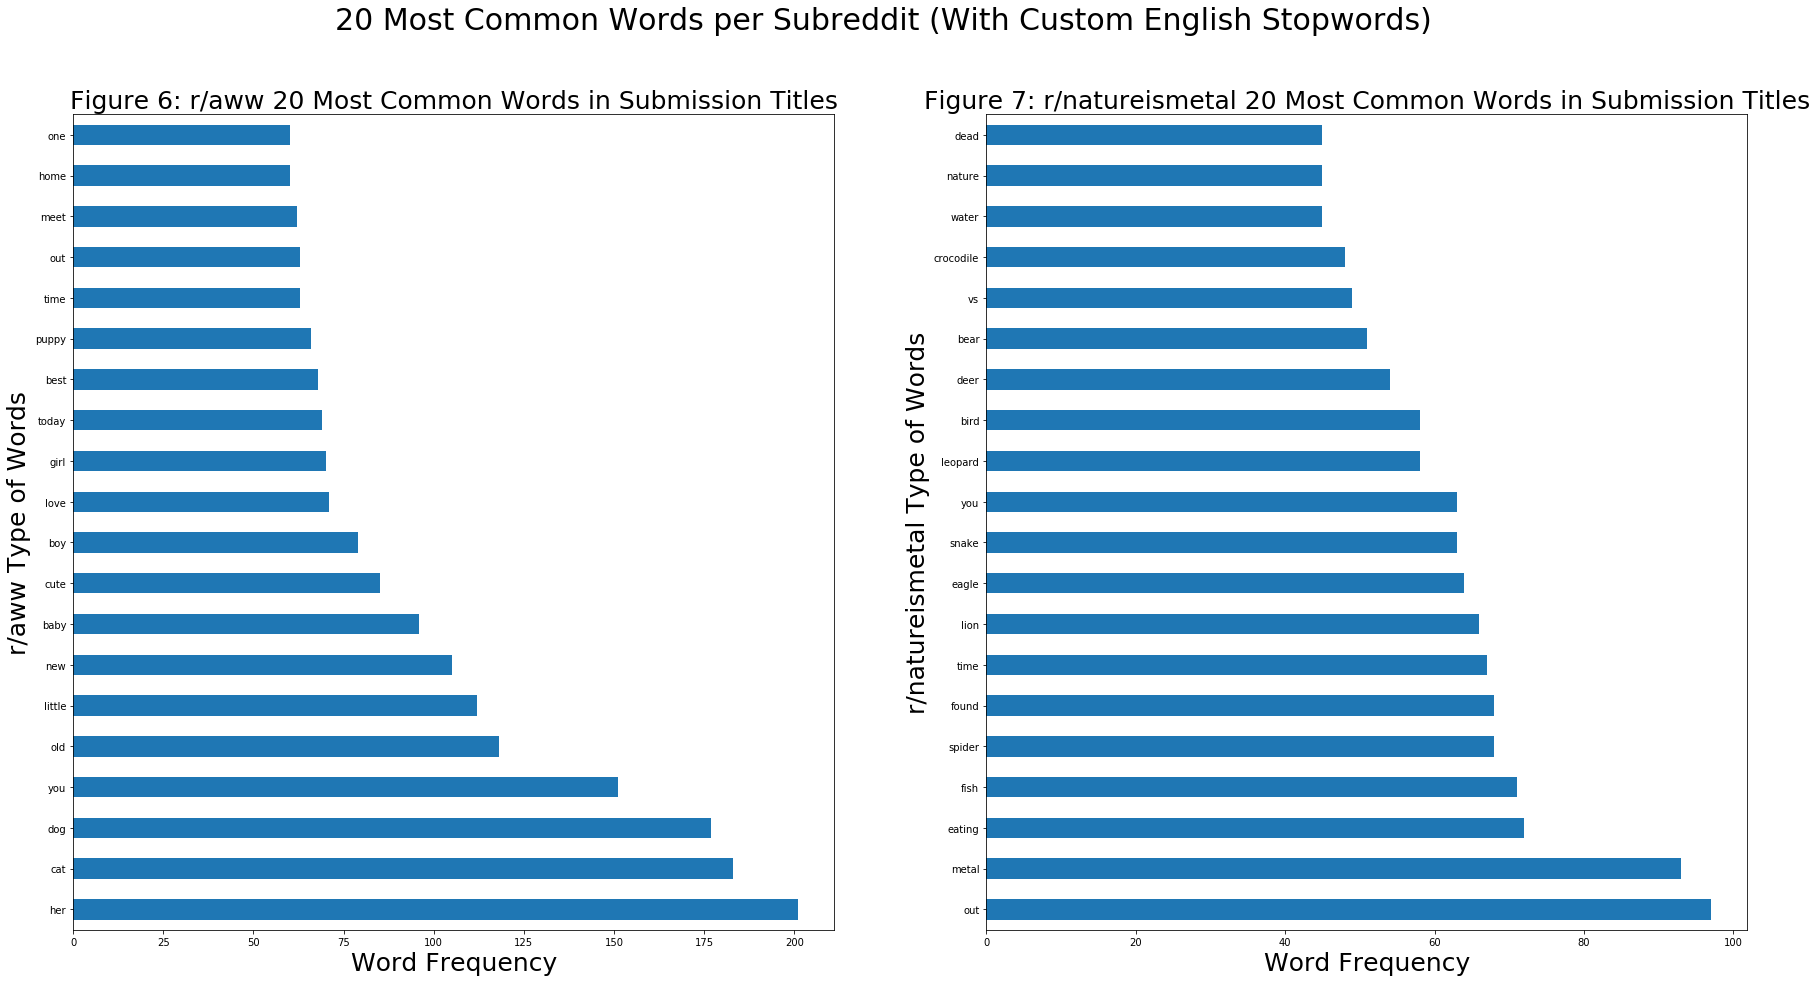

In [29]:
xdcol1 = aww_df['title'] #left plot x data
xdcol2 = metal_df['title'] #right plot x data

bigtitle = '20 Most Common Words per Subreddit (With Custom English Stopwords)' #superior title
leftx = 'Word Frequency' #left plot xlabel
lefty = 'r/aww Type of Words' #left plot ylabel
lefttitle = 'Figure 6: r/aww 20 Most Common Words in Submission Titles' #left plot title
rightx = 'Word Frequency' #right plot xlabel
righty = 'r/natureismetal Type of Words' #right plot ylabel
righttitle = 'Figure 7: r/natureismetal 20 Most Common Words in Submission Titles' #right plot title
words_to_stop_on = custom_stopwords #stopwords

plot_wordvec(xdcol1,xdcol2,bigtitle,leftx,lefty,lefttitle,rightx,righty,righttitle,words_to_stop_on) #utilizes plotting function

From the above two figures, we can see which word differentiates each subreddit and it is indeed pleasing to see how dramatic the differences are across each subreddit. From the submission titles alone, we can begin to expect that our model will not have much issue differentiating between each subreddit due to the word frequencies. There is enough controversial and unrelated meaning across most common word definitions for us to start pinpointing what factors are going to help our models understand the classifications.

Figure 6 shows that the top three most common words (through our stopword filter) for r/aww are "her", "cat", and "dog." Other notable mentions are "little", "cute", "love", and "puppy." These words in particular are no surprise to us when making an analysis of r/aww's collective image through their Rules and Guidelines and its About section. While it may not be within our scope of work to prove how such words can have a some psychological effect when paired together inducing "positive feelings" or "positive intent", we can hypothesize that these words do have an easier and more fitting association with what encapsulates an "aww" moment in all of us (speaking from a personal standpoint). 

Figure 7 shows the top three most common words (through our stopword filter) for r/natureismetal are "out", "metal", and "eating." Other notable mentions are "spider", "lion", "eagle", "snake","leopard", "bear", "crocodile", and "dead." Such words thought of together do not personally invoke "positive intent" (especially a word like "death"). For the most part, many of these words have me feeling a sense of danger across all of their personal interpretations. All flight or flight responses aside, it is almost inherently obvious to understand how such words are found to be more popular on r/natureismetal.  

# 3.00 Machine Learning Modeling and Visualization

## 3.01 Model Preparation

### Prediction Dummification

We are now going to dummify our predictions here to incorporate into our models. The prediction values will be the `subreddit` from the `jumbled_df` representing our r/dangerouslycute dataframe. We are dummifying here and not in the cleaning section made previously because we wanted to still utilize the naming convention of the `subreddit` column before its conversion to dummy. 

In [30]:
jumbled_df['natureismetal'] = pd.get_dummies(jumbled_df['subreddit'], drop_first= True) #dummyfies our predictor column

### Train, Test, and Split

In [31]:
X = jumbled_df['title'] #sets our model feature
y = jumbled_df['natureismetal'] #sets our model prediction/label for supervised learning 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42, 
                                                    stratify = y) #splits our data into a 75% training set and 25% testing set and stratifies our data to be a match

To train our models, we split our jumbled dataframe of r/dangerouslycute randomly into two separate coupled dataframes. One coupled dataframe contains two series amalgamating for 75% of the original data in both features and predictions. The remaining 25% of the data will be used to test our model against. A `stratify` command was used in the split to help eliminate any imbalance in the data. 

As we plan to use Naive Bayes in our modeling, we are going to need to convert our vectorized word features into a dense matrix as opposed to leaving it in its sparse matrix form. This is the reason for the creation of the class-object below.

In [33]:
#To transform data into a dense matrix (credit to Mahdi Shadkam-Farrokhi)
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.toarray()

## 3.02 Modeling

For modeling, our processes will be broken down into their own respective pipelines where crossvalidated gridearches will be conducted for discovering the best combination of parameters for each form of modeling. We will iterate between Naive Bayes models and Logistic Regression models, utilizing the CountVectorizer and TFIDFVectorizer. Lemmatizing and Stemming were explored as considerable options to be included with the modeling process, but the information gained from such methods was not constructive in helping us portray a good model. The below accuracy measures are displayed for each pipeline and are utilizing the best known paramters after iterating through different values. 

### Baseline Model

In [34]:
y_train.value_counts(normalize = True) #displays the normalized value counts of predictions

1    0.5
0    0.5
Name: natureismetal, dtype: float64

The above shows our baseline model for our predictions, which is a normalized value of all of our predictions. In this case scenario, both of classes in our predictions are equally distributed within our training data. This means that if we were to guess a certain class for each feature presented to us, we would end up being correct 50% of the time. The same would apply to the guesses of the other prediction using such features. Our most successful model must perform better than this threshold at the very least.

### CountVectorizer & Logistic Regression Pipeline Preparation

In [35]:
cvec_log = [
    ("cvec", CountVectorizer()),
    ("logreg", LogisticRegression())] #list of CVEC pipeline

cvec_log_params = {
    'cvec__max_features': [2850,10_000,20_000],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words': [None, custom_stopwords],

    'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga']} #list of parameters in CVEC log pipeline

cvec_log_pipe = Pipeline(cvec_log) #instatiated my pipeline for the CVEC logistic regression

cvec_log_cv = GridSearchCV(cvec_log_pipe, cvec_log_params, cv = 5, scoring= 'accuracy') #crossvalidated gridsearch
cvec_log_cv.fit(X_train, y_train)
print(f'The best cross validated score using logistic regression with the Count Vectorizer features is: {cvec_log_cv.best_score_}')
print(f'The best performing features are: {cvec_log_cv.best_params_}')

The best cross validated score using logistic regression with the Count Vectorizer features is: 0.8802666666666666
The best performing features are: {'cvec__max_features': 20000, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': {'if', 'again', 'shouldn', 'further', "couldn't", 'yourselves', 'me', 'him', "weren't", 'haven', 'any', 'his', 'i', 'do', 'mightn', 'ourselves', 'your', 'these', 'had', "shan't", 'she', "doesn't", 'what', "wasn't", 'them', 'yours', "you'll", "needn't", 'too', "haven't", 'through', 'doing', 'more', 'like', 'it', 'isn', 'they', 'then', 'where', 'being', 'will', 'o', 'just', 'themselves', 'at', 'its', "shouldn't", 'having', 'such', "it's", 'm', 'off', 'those', 'y', 'itself', 'so', "you're", 'didn', 'both', 'to', 'only', 'can', 're', 'few', 'are', 'some', "that'll", "don't", 'he', 'll', 'needn', 'during', 'hadn', 'all', "you'd", "mustn't", 'by', 'd', 'each', 'there', 'not', "didn't", 'is', 't', 've', 'ma', 'same', 'myself', 'does', 'on', 'mustn', 'and', 'weren', 's'

### TFIDFVectorizer & Logistic Regression Pipeline

In [36]:
tvec_log = [
    ("tvec", TfidfVectorizer()),
    ("logreg", LogisticRegression())]

tvec_log_params = {
    'tvec__max_features': [1100,1200,1300],
    'tvec__ngram_range': [(1,1), (1,2)],
    'tvec__stop_words':[None, custom_stopwords],

    'logreg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga']
}

tvec_log_pipe = Pipeline(tvec_log) #instatiated my pipeline for the TVEC logistic regression

tvec_log_cv = GridSearchCV(tvec_log_pipe, tvec_log_params, cv = 5, scoring= 'accuracy')
tvec_log_cv.fit(X_train, y_train)
print(f'The best cross validated score using logistic regression with the TFIDF Vectorizer features is: {tvec_log_cv.best_score_}')
print(f'The best performing features are: {tvec_log_cv.best_params_}')

The best cross validated score using logistic regression with the TFIDF Vectorizer features is: 0.8546666666666667
The best performing features are: {'logreg__solver': 'lbfgs', 'tvec__max_features': 1100, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}


### CountVectorizer & Multinomial Naive Bayes Pipeline

In [37]:
cvec_mnb = [
    ("cvec", CountVectorizer()),
    ("dense", DenseTransformer()),
    ("mnb", MultinomialNB())
]

cvec_mnb_params = {
    'cvec__max_features': [4000,5000,6000,7000],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words': [None, custom_stopwords],
    
    'mnb__alpha': [0,0.4,0.5,0.6,1]}

cvec_mnb_pipe = Pipeline(cvec_mnb) #instatiated my pipeline for the CVEC Multinomial Naive Bayes regression

cvec_mnb_cv = GridSearchCV(cvec_mnb_pipe, cvec_mnb_params, cv = 5, scoring = 'accuracy') #corssvalidated gridsearch
cvec_mnb_cv.fit(X_train, y_train) #fits the model
print(f'The best cross validated score using Multinomial Naive Bayes with the Count Vectorizer features is: {cvec_mnb_cv.best_score_}')
print(f'The best performing features are: {cvec_mnb_cv.best_params_}')

The best cross validated score using Multinomial Naive Bayes with the Count Vectorizer features is: 0.8893333333333333
The best performing features are: {'cvec__max_features': 4000, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'mnb__alpha': 0.4}


### TFIDFVectorizer & Multinomial Naive Bayes Pipeline

In [38]:
tvec_mnb = [
    ("tvec", TfidfVectorizer()),
    ("dense", DenseTransformer()),
    ("mnb", MultinomialNB())
] 

tvec_mnb_params = {
    'tvec__max_features': [4000,5000,6000,7000],
    'tvec__ngram_range': [(1,1), (1,2)],
    'tvec__stop_words':[None, custom_stopwords],

    'mnb__alpha': [0,0.2,0.3,0.4]
}

tvec_mnb_pipe = Pipeline(tvec_mnb) #instatiated my pipeline for the TVEC Multinomial Naive Bayes regression

tvec_mnb_cv = GridSearchCV(tvec_mnb_pipe, tvec_mnb_params, cv = 5, scoring= 'accuracy') #crossvalidated gridsearch
tvec_mnb_cv.fit(X_train, y_train) #fits the model
print(f'The best cross validated score using Multinomial Naive Bayes with the TFIDF Vectorizer features is: {tvec_mnb_cv.best_score_}')
print(f'The best performing features are: {tvec_mnb_cv.best_params_}')

The best cross validated score using Multinomial Naive Bayes with the TFIDF Vectorizer features is: 0.8912
The best performing features are: {'mnb__alpha': 0.3, 'tvec__max_features': 6000, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': None}


### CountVectorizer & Gaussian Naive Bayes Pipeline

In [39]:
cvec_gnb = [
    ("cvec", CountVectorizer()),
    ("dense", DenseTransformer()),
    ("gnb", GaussianNB())
]

cvec_gnb_params = {
    'cvec__max_features': [12_000, 13_000, 14_000],
    'cvec__ngram_range': [(1,1), (1,2), (1,3), (1,4)],
    'cvec__stop_words': [None, custom_stopwords],
}

cvec_gnb_pipe = Pipeline(cvec_gnb) #instatiated my pipeline for the CVEC Gaussian Naive Bayes regression

cvec_gnb_cv = GridSearchCV(cvec_gnb_pipe, cvec_gnb_params, cv = 5, scoring= 'accuracy') #crossvalidated gridsearch
cvec_gnb_cv.fit(X_train, y_train) #fits the model
print(f'The best cross validated score using Gaussian Naive Bayes with the Count Vectorizer features is: {cvec_gnb_cv.best_score_}')
print(f'The best performing features are: {cvec_gnb_cv.best_params_}')

The best cross validated score using Gaussian Naive Bayes with the Count Vectorizer features is: 0.8442666666666667
The best performing features are: {'cvec__max_features': 13000, 'cvec__ngram_range': (1, 3), 'cvec__stop_words': None}


### TFIDFVectorizer & Gaussian Naive Bayes Pipeline

In [40]:
tvec_gnb = [
    ("tvec", TfidfVectorizer()),
    ("dense", DenseTransformer()),
    ("gnb", GaussianNB())
]

tvec_gnb_params = {
    'tvec__max_features': [10_000, 12_000, 13_000, 15_000],
    'tvec__ngram_range': [(1,1), (1,2), (1,3), (1,4)],
    'tvec__stop_words':[None, custom_stopwords]
}

tvec_gnb_pipe = Pipeline(tvec_gnb) #instatiated my pipeline for the TVEC Gaussian Naive Bayes regression

tvec_gnb_cv = GridSearchCV(tvec_gnb_pipe, tvec_gnb_params, cv = 5, scoring= 'accuracy') #crossvalidated gridsearch
tvec_gnb_cv.fit(X_train, y_train) #fits the model
print(f'The best cross validated score using Gaussian with the TFIDF Vectorizer features is: {tvec_gnb_cv.best_score_}')
print(f'The best performing features are: {tvec_gnb_cv.best_params_}')

The best cross validated score using Gaussian with the TFIDF Vectorizer features is: 0.8448
The best performing features are: {'tvec__max_features': 13000, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': None}


## 3.03 Model Selection

__CountVectorizer & Logistic Regression__:

The best cross validated score using logistic regression with the Count Vectorizer features is: 0.8802666666666666

The best performing features are: {'cvec__max_features': 20000, 'cvec__ngram_range': (1, 2), 'cvec__stop_words':custom_stopwords}

--------------------------

__TFIDFVectorizer & Logistic Regression__:

The best cross validated score using logistic regression with the TFIDF Vectorizer features is: 0.8549333333333333

The best performing features are: {'logreg__solver': 'saga', 'tvec__max_features': 1100, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}

--------------------------

__CountVectorizer & Multinomial Naive Bayes__:

The best cross validated score using Multinomial Naive Bayes with the Count Vectorizer features is: 0.8893333333333333

The best performing features are: {'cvec__max_features': 4000, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'mnb__alpha': 0.4}

--------------------------

__TFIDFVectorizer & Multinomial Naive Bayes__:

The best cross validated score using Multinomial Naive Bayes with the TFIDF Vectorizer features is: 0.8912

The best performing features are: {'mnb__alpha': 0.3, 'tvec__max_features': 6000, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': None}

--------------------------

__CountVectorizer & Gaussian Naive Bayes__:


The best cross validated score using Gaussian Naive Bayes with the Count Vectorizer features is: 0.8442666666666667

The best performing features are: {'cvec__max_features': 13000, 'cvec__ngram_range': (1, 3), 'cvec__stop_words': None}

---------------------------


__TFIDFVectorizer & Gaussian Naive Bayes__:

The best cross validated score using Gaussian Naive Bayes with the Count Vectorizer features is: 0.8448

The best performing features are: {'tvec__max_features': 13000, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': None}

All of our models were successfully able to strive above the baseline model threshold score of 50%. This is a decent success and good undertsanding to recognize that all of the models were fairly appropriate in their use of discovering word/expression affiliation for each subreddit. All models had also undergone a 5 fold cross validation grid search to ensure score metrics are as accurate as they can be with the associated parameters for vectorizing and modeling. 

With all model accuracy measures shown above, our best performing model, with an accuracy score of ~0.89 (or 89%) is our Multinomial Naive Bayes Model using a TFIDF Vectorizer. It performed stronger than the other models with paramaters such as:

- Alpha value of 0.3
- Maximum features considered to be 6,000
- N-gram Token Range of (1,1)
- No use of any stop words.

We are still able to utilize the Logistic Regression models as interpretable models and will do so to understand our features better. The best Logistic Regression model shown here is the first model using a Count Vectorizer. It performed stronger than the regression model with TFIDF Vectorizer with parameters such as:

- Default Logistic Regression Fit (solver = 'lbfgs')
- Maximum features considered to be 20,000
- N-gram Token Range of (1,2)
- Use of custom stopwords

## 3.04 Model Evaluation

Our successful model was the Multinomial Naive Bayes model utilizing a TFIDF Vectorizer. According to the sklearn documentation for the Multinomial Naive Bayes, it is [considered to be a classifier to be "suitable for classification with discrete features (e.g. word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) 

A Naive Bayes model will typically have the assumption that each one of its features is independent from one another. When it comes to analyzing textual data, this assumption is very often violated as expression meanings begin to host probable weight into its context. For instance, if we just assumed independence, that would automatically qualify the expression "not good" as "good" as the "not" term has no relevance on the entire intent of the expression. With this in mind, the Naive Bayes classifier still outperforms other models often in text classification due to its capabilities for Laplacian smoothing using a metric known as "alpha" which increases probability weight of bigrams in our bayes probability formula.[Source](https://datascience.stackexchange.com/questions/30473/how-does-the-mutlinomial-bayess-alpha-parameter-affects-the-text-classificati) 

In [41]:
#Training Confusion Matrix
tvec_mnb_params = {
    'tvec__max_features': [6000],
    'tvec__ngram_range': [(1,1)],
    'tvec__stop_words':[None],

    'mnb__alpha': [0.3]
}
tvec_mnb_cv.fit(X_train, y_train)
print(f'The best cross validated score using Multinomial Naive Bayes with the TFIDF Vectorizer features is: {tvec_mnb_cv.best_score_}')
trainpred = tvec_mnb_cv.predict(X_train)
traincm = confusion_matrix(y_train, trainpred)
cm_df = pd.DataFrame(traincm, columns=['Training Predicted r/aww', 'Training Predicted r/natureismetal'], index=['Training Actual r/aww', 'Training Actual r/natureismetal'])
cm_df

The best cross validated score using Multinomial Naive Bayes with the TFIDF Vectorizer features is: 0.8912


,Training Predicted r/aww,Training Predicted r/natureismetal
Training Actual r/aww,1843,32
Training Actual r/natureismetal,69,1806


Above we able to see how well our model made its predictions by utilizing a confusion matrix. An accuracy score of ~89% leaves us with a total misclassification error of ~11%. From such misclassifications, we found that our model had a very high sensitivity rate and a very high specificity rate. This is interesting to observe as both subreddits did have their clear differences when we explored their data. We would think our crossvalidated grid search would have utilized the custom stop words variable made, but instead it felt that using no stop words was the best course of action.  

In [42]:
#Testing Confusion Matrix
tvec_mnb_cv = GridSearchCV(tvec_mnb_pipe, tvec_mnb_params, cv = 5, scoring= 'accuracy') #crossvalidated gridsearch
tvec_mnb_cv.fit(X_test, y_test)
print(f'The best cross validated score using logistic regression with the Count Vectorizer features is: {tvec_mnb_cv.best_score_}')


testpred = tvec_mnb_cv.predict(X_test)
testcm = confusion_matrix(y_test, testpred)
cm_df = pd.DataFrame(testcm, columns=['Testing Predicted r/aww', 'Testing Predicted r/natureismetal'], index=['Testing Actual r/aww', 'Testing Actual r/natureismetal'])
cm_df

The best cross validated score using logistic regression with the Count Vectorizer features is: 0.8432


,Testing Predicted r/aww,Testing Predicted r/natureismetal
Testing Actual r/aww,618,7
Testing Actual r/natureismetal,18,607


When observing the same most successful parameters from our training model of the TFIDFVectorized features in a Multinomial Naive Bayes model, we see a reduction in our accuracy for our test data. The testing accuracy score is ~84% with a misclassification rate of ~16%. Our sensitivity and specificity rates were high throughout the training and testing. Our model shows some overfitting indicating that there is high variance and low bias.  

In [43]:
cvec_log_params = {
    'cvec__max_features': [20_000],
    'cvec__ngram_range': [(1,2)],
    'cvec__stop_words': [custom_stopwords],

    'logreg__solver': ['lbfgs']} #list of parameters in CVEC log pipeline

cvec_log_pipe = Pipeline(cvec_log) #instatiated my pipeline for the CVEC logistic regression

cvec_log_cv = GridSearchCV(cvec_log_pipe, cvec_log_params, cv = 5, scoring= 'accuracy') #crossvalidated gridsearch
cvec_log_cv.fit(X_test, y_test)
print(f'The best cross validated score using logistic regression with the Count Vectorizer features is: {cvec_log_cv.best_score_}')
testpred = cvec_log_cv.predict(X_test)
testcm = confusion_matrix(y_test, testpred)
cm_df = pd.DataFrame(testcm, columns=['Testing Predicted r/aww', 'Testing Predicted r/natureismetal'], index=['Testing Actual r/aww', 'Testing Actual r/natureismetal'])
cm_df

The best cross validated score using logistic regression with the Count Vectorizer features is: 0.8312


,Testing Predicted r/aww,Testing Predicted r/natureismetal
Testing Actual r/aww,624,1
Testing Actual r/natureismetal,5,620


Our Logistic Regression model using a Count Vectorizer had an accuracy measure of ~83% with a misclassification rate of ~17%. The model's specificity and sensitivity were also very high. This model's predictive abilities should not compare against our stronger Multinomial Naive Bayes model above using a TFIDF Vectorizer, as the Binomial Naive Bayes model was determined to be the most successful model for our study. However, we must remember that this Logistic Regression can be analyzed as an interpretive model, where analysis can be honed in on the coefficients representing the weight a word's meaning has for affiliation with a subreddit. Below we will dive into the top performing words of our Logistic Regression model. 

In [44]:
words_df = pd.DataFrame(cvec_log_cv.best_estimator_.steps[0][1].vocabulary_, index = cvec_log_cv.best_estimator_.steps[0][1].vocabulary_.values()) #converts our vocabulary dictionary into a dataframe
words_df['unique_unique_unique_unique'] = words_df.columns #makes a super unique column of just the words with respect to their positional argument. the reason why this column is called this is because we dont want an instance of overwriting any actual meaningful word column with our column of types of words found in the model. we rely on the idea that nobody has every written a submission title of "unique_unique_unique_unique". If so, then this was pointless. 
vocabulary_df = words_df['unique_unique_unique_unique'] #masks a new dataframe to eliminate the improper dataframe rows and columns
another_step = vocabulary_df.to_frame() #converts our series to an actual dataframe
useable_vocabulary_df = cp.deepcopy(another_step) #makes an unattached copy of this dataframe for easier handling
useable_vocabulary_df.rename(columns = {'unique_unique_unique_unique': 'word'}, inplace = True) #finally names our word column appropriately
useable_vocabulary_df['coefficients'] = cvec_log_cv.best_estimator_.steps[1][1].coef_[0] #adds values to our new dataframe with the the proper indexing
useable_vocabulary_df.sort_values(by = 'coefficients') #we sort our dataframe by the coefficients column to find out useful information

,word,coefficients
3074,giant horned,-1.794342
420,around,-1.491894
5957,progress got,-1.355586
4327,likes nephew,-1.191680
5680,phone,-1.113640
...,...,...
952,born,1.147720
8435,youtu,1.305046
6168,reality,1.314179
3218,googly,1.341870


Above we can see the dataframe output of our coefficients from our logistic regresison model. The negative values indicate that our instances where a coefficient is predicting an affiliation with r/natureismetal. These coefficients are representative of the log odds of the the words likely association with a subreddit. The below will intterpret a few of the most popular words associated with each reddit in reference to its affiliation with r/aww. 

In [45]:
print(f'Use of the expression "frogger" will indicate a submission has a {np.exp(1.365748)} times likelihood of being affiliated with r/aww, all else held equal.')
print('\n')
print(f'Use of the expression "googly" will indicate a submission has a {np.exp(1.341870)} times likelihood of being affiliated with r/aww, all else held equal.')
print('\n')
print(f'Use of the expression "reality" will indicate a submission has a {np.exp(1.314179)} times likelihood of being affiliated with r/aww, all else held equal.')
print('\n')
print(f'Use of the expression "giant horned" will indicate a submission has a {np.exp(-1.794342)} times likelihood of being affiliated with r/aww, all else held equal. This means this expression is more affiliated with r/natureismetal as it is below a 1 times likelihood threshold.')
print('\n')
print(f'Use of the expression "around" will indicate a submission has a {np.exp(-1.491894)} times likelihood of being affiliated with r/aww, all else held equal. This means this expression is more affiliated with r/natureismetal as it is below a 1 times likelihood threshold.')
print('\n')
print(f'Use of the expression "progress got" will indicate a submission has a {np.exp(-1.355586)} times likelihood of being affiliated with r/aww, all else held equal. This means this expression is more affiliated with r/natureismetal as it is below a 1 times likelihood threshold.')

Use of the expression "frogger" will indicate a submission has a 3.918653108540146 times likelihood of being affiliated with r/aww, all else held equal.


Use of the expression "googly" will indicate a submission has a 3.826191798292184 times likelihood of being affiliated with r/aww, all else held equal.


Use of the expression "reality" will indicate a submission has a 3.721694219666296 times likelihood of being affiliated with r/aww, all else held equal.


Use of the expression "giant horned" will indicate a submission has a 0.1662368001819697 times likelihood of being affiliated with r/aww, all else held equal. This means this expression is more affiliated with r/natureismetal as it is below a 1 times likelihood threshold.


Use of the expression "around" will indicate a submission has a 0.22494620370721408 times likelihood of being affiliated with r/aww, all else held equal. This means this expression is more affiliated with r/natureismetal as it is below a 1 times likelihood thre

# 4.00 Conclusions

The question comes down to whether we were able to create a model strong enough for app development. Before answering this question, let's recap on some of the things mentioned that would affect our data and modeling:

- our data sample was only 5000 submissions from subreddits with millions of users and thousands online at a given time (50/50 split for r/aww and r/natureismetal content)
- our data did not appear to be very popular content due to the lack of comments, high scores, and virtual awards (this means there was less scrutiny)
- our models were only based off the submission titles alone (lacking other helpful classification features, numeric weighting, text data, and image data)
- we did not explore every possible model known to existance and did not explore every parameter to help a model's accuracy

With a testing accuracy score of ~84% with our successful Multinomial Naieve Bayes model (incorporating a TFIDF Vectorizer), we are left with ~16% error in our model. In the world of large data, this sort of error will not be tolerated on the app market and our app will not be marketed as a successful app as a fair portion of posts we wish to differentiate on r/dangerouslycute will fail to be filtered. My girlfriend will be unhappy to learn this and I am sure many users who feel the same as her about r/dangerouslycute's content will feel the same way. However, the scores we found through these models across different parameters does not indicate a lost cause. With all of the assumptions made for our models and with all of the considerations for error made with our models, there is room for improvement. With only 5000 submissions total which were possibly not very scrutinized, our model successfully recognizes from the titles alone which subreddit some submission comes from with ~84% accuracy (doesn't sound bad when thinking about it in this way). This is certainly not app ready, but considerations for the future, we could incorporate:

- ensemble modeling methods to get better model outputs
- pulling more data in general
- analyzing more scrutinzed data
- using a web server to run calculations and many models 
- considering other fetaures to better our model's performance (NSFW calssifiers, numeric popularity weights, text features, image features)

All this considered, we will be continuing to work on a better model to help make our app ready for deployment. Once a successful model is considered, we could begin to further generalize our filtering algorithms and maybe move our model onto other subreddits facing the same problem. 

# 5.00 Sources and References

- [r/aww subreddit page](https://www.reddit.com/r/aww/)
- [r/natureismetal page](https://www.reddit.com/r/natureismetal)
- [Google Search of Reddit Creation](https://www.google.com/search?client=safari&rls=en&q=when+did+reddit+begin&ie=UTF-8&oe=UTF-8)
- [Reddit Search of Reddit Founders](https://www.reddit.com/r/AskReddit/comments/21875u/what_happend_with_the_guys_who_created_reddit_are/)
- [Reddit Robots.txt Page](https://www.reddit.com/robots.txt)
- [pushshift.io API Webpage](https://pushshift.io)
- [pushift Github Repository](https://github.com/pushshift/api)
- [r/aww Rules & Guidelines](https://www.reddit.com/r/aww/wiki/index)
- [r/natureismetal Rules & Guidelines](https://www.reddit.com/r/natureismetal/submit)
- [Most Common English Words](https://www.rypeapp.com/most-common-english-words/)
- [Wikipedia Search of Most Common Words Shown in Every Language](https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists)
- [Scikit-learn Documentation Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
- [Multinomial Naive Bayes forum on meaning of alpha](https://datascience.stackexchange.com/questions/30473/how-does-the-mutlinomial-bayess-alpha-parameter-affects-the-text-classificati)